In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
iris_df = load_iris()

In [ ]:
iris_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#loading the dataset into pandas data frame
df = pd.DataFrame(iris_df.data, columns = iris_df.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris_df.target #creating column for target variable
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.shape

(150, 5)

In [ ]:
#creating another column for flower names
df['flower_name'] = df.target.apply(lambda x: iris_df.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


0 -->setosa

1-->versicolor

2-->virginica

In [ ]:
#creating 3 separate df for visualization
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Sepal length vs Sepal Width (Setosa vs Versicolor)

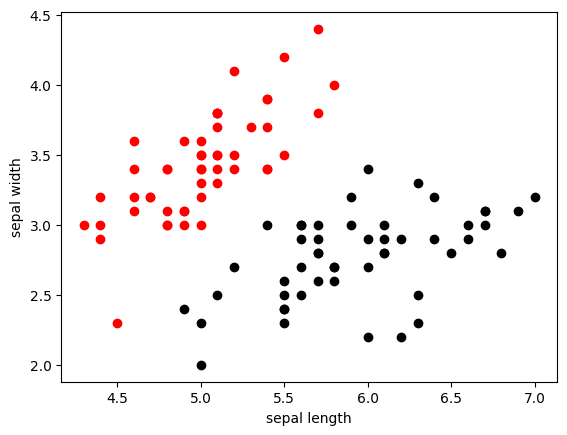

In [ ]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'red') #setosa
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'black') #versicolor

Petal length vs Pepal Width (Setosa vs Versicolor)

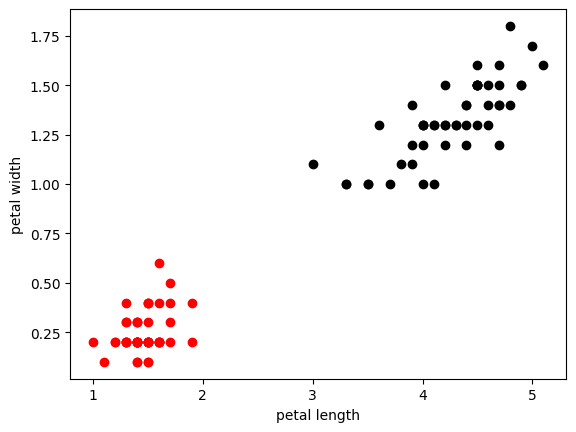

In [ ]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'red') #setosa
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'black') #versicolor

In [ ]:
#separating feature and target variables
X = df.drop(['target', 'flower_name'], axis = 'columns')
Y = df.target

In [ ]:
X_test, X_train, Y_test, Y_train = train_test_split(X,Y, test_size = 0.2)

In [ ]:
#model training
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [ ]:
model.score(X_test, Y_test)

0.8916666666666667

In [ ]:
model.predict([[7.0,3.2,4.7,1.4	]])

array([1])

Tune parameters

In [ ]:
#Regularization (C)
model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

0.8916666666666667

In [ ]:
#Gamma
model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.7

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)
model_linear_kernal.score(X_test, Y_test)

0.9166666666666666